# Modelo de regresión lineal para la predicción de la duración de los quirófanos.
 ## Análisis del rendimiento del modelo de regresión lineal.
 
 ### Trabajo de Fin de Grado - Universidad de Burgos
 #### Jesús García Armario

In [1]:
# Imports necesarios
import numpy as np
from linearReg import LinearReg
import pandas as pd
import sys
sys.path.append('..\\')
import Utils.common as common

In [2]:
# Leemos el listado preprocesado de datos
data = common.FileToDataframe('../../Datos/Listados_Preprocesados/ListadoInterv_Preprocesado_Codificado.xlsx')

In [3]:
X, Y = common.divideData(data)

In [4]:
# Usamos un método de GridSearch para encontrar los mejores parámetros para el modelo
# de regresión lineal
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
# Definimos los parámetros que queremos probar
parameters = {'fit_intercept': [True, False], 'copy_X': [True, False],'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# Creamos el objeto GridSearchCV
reg = GridSearchCV(LinearRegression(), parameters, cv=5)
# Entrenamos el modelo
reg.fit(X, Y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [5]:
# Entrenamos el modelo con los parámetros encontrados
model = LinearReg(data=X, target=Y, n_jobs=reg.best_params_['n_jobs'], fit_intercept=reg.best_params_['fit_intercept'], copy_X=reg.best_params_['copy_X'], test_size=0.2, random_state=42)

In [6]:
# Mostramos los resultados
print('MSE: ', model.getMSE())
print('R2: ', model.getR2())
print('Cross Validation MSE: ', model.getCrossValMSE())
print('Cross Validation R2: ', model.getCrossValR2())
print('Cross Validation RMSE: ', model.getCrossValRMSE())

MSE:  184856347.18167934
R2:  -0.0004123032170841867
Cross Validation MSE:  55694590.09043643
Cross Validation R2:  -0.00045008853367223267
Cross Validation RMSE:  7462.880817113217


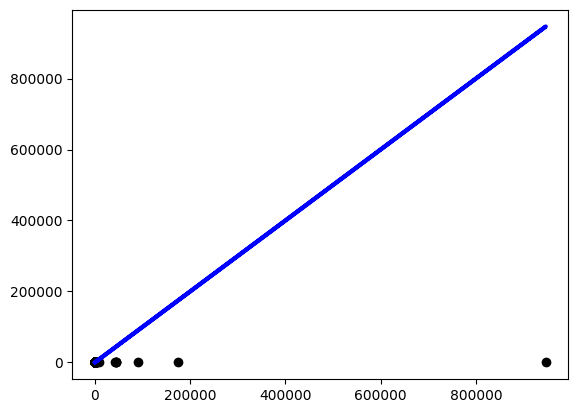

In [7]:
# Representamos gráficamente los resultados de la predicción
import matplotlib.pyplot as plt
plt.scatter(model.y_test, model.y_pred, color='black')
plt.plot(model.y_test, model.y_test, color='blue', linewidth=3)
plt.show()

In [8]:
# Exportamos el modelo a un fichero
model.exportModel('linearRegModel.pkl')

In [9]:
# Cargamos los datos del dataset ampliado
data = common.FileToDataframe('../../Datos/Listados_Preprocesados/ListadoInterv_Preprocesado_PLASTICA_Codificado.xlsx')
X, Y = common.divideDataAmpli(data)

c:\Users\jesus\OneDrive\Ingeniería\Cuarto\TFG\GestorQuirofanos\Modelos\Regresión\..\Utils\common.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Código diagnóstico'] = data['Código diagnóstico'].astype(float)


In [10]:
parameters = {'fit_intercept': [True, False], 'copy_X': [True, False],'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# Creamos el objeto GridSearchCV
reg = GridSearchCV(LinearRegression(), parameters, cv=5)
# Entrenamos el modelo
reg.fit(X, Y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [11]:
# Entrenamos el modelo con los parámetros encontrados
model_plastica = LinearReg(data=X, target=Y, n_jobs=reg.best_params_['n_jobs'], fit_intercept=reg.best_params_['fit_intercept'], copy_X=reg.best_params_['copy_X'], test_size=0.2, random_state=42)

In [12]:
# Mostramos los resultados
print('MSE: ', model_plastica.getMSE())
print('R2: ', model_plastica.getR2())
print('Cross Validation MSE: ', model_plastica.getCrossValMSE())
print('Cross Validation R2: ', model_plastica.getCrossValR2())
print('Cross Validation RMSE: ', model_plastica.getCrossValRMSE())

MSE:  6713107.073417787
R2:  -0.01549794764644119
Cross Validation MSE:  10660977.998847408
Cross Validation R2:  -0.01861039803653952
Cross Validation RMSE:  3265.115311722912


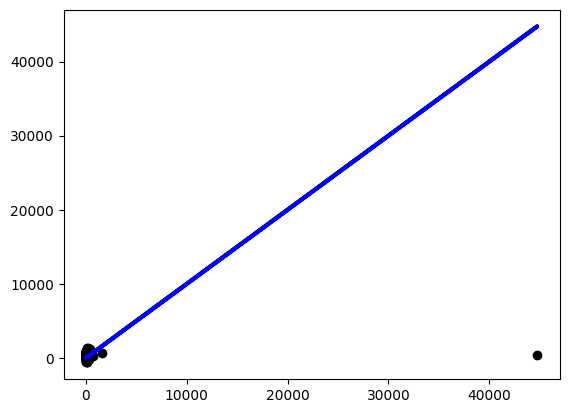

In [13]:
# Representamos gráficamente los resultados de la predicción
import matplotlib.pyplot as plt
plt.scatter(model_plastica.y_test, model_plastica.y_pred, color='black')
plt.plot(model_plastica.y_test, model_plastica.y_test, color='blue', linewidth=3)
plt.show()

In [14]:
# Lo exportamos a un fichero
model.exportModel('linearRegModel_PLASTICA.pkl')